# Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. 

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
# Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [2]:
# Replace missing values with interpolation since data is time series

education2_df = education_df.copy()

null_val = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE',
           'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G',
           'GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G',
           'AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']

for col in null_val:
    education2_df.loc[:, col].interpolate(inplace=True)

#### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [3]:
education2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1491.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,232.723472,275.734024,218.971553,263.267799
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,9.405215,8.754805,5.959927,4.978792
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,226.267129,270.096001,216.126818,260.490023
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,234.226904,275.711254,219.771325,262.617766
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,240.163315,282.702092,222.684611,266.849675
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


The average total expenditure is more than the average total revenue, indicating a budget deficit. Majority of total expenditure is allotted to instruction expenditure. On average, local revenue constitutes approximately half of total revenue. The average math score is higher than reading scores.

#### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

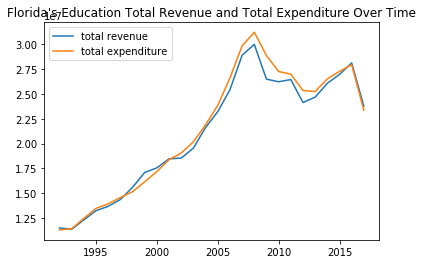

In [4]:
# Plot total revenue and total expenditure 

florida = education2_df[(education2_df.STATE == 'FLORIDA')]

plt.plot(florida['YEAR'], florida['TOTAL_REVENUE'], label = 'total revenue')

plt.plot(florida['YEAR'], florida['TOTAL_EXPENDITURE'], label = 'total expenditure')

plt.title("Florida's Education Total Revenue and Total Expenditure Over Time")
plt.legend()
plt.show()

The Floridan education budget underwent a deficit from early 2000s and then didn't break even until late 2015. 

#### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

Text(0.5,1,'Difference Between Average Math and Reading 8 Score')

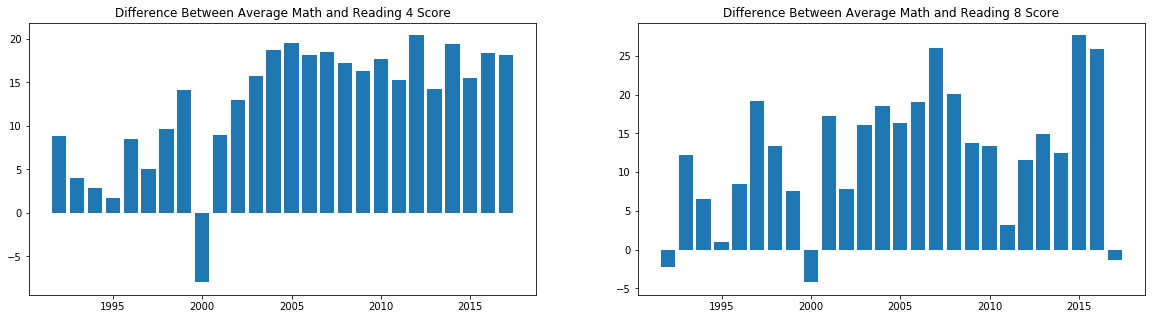

In [5]:
# Calculate difference between average math and reading scores 

diff_4_score = florida[('AVG_MATH_4_SCORE')] - florida[('AVG_READING_4_SCORE')]
diff_8_score = florida[('AVG_MATH_8_SCORE')] - florida[('AVG_READING_8_SCORE')]

# Plot difference 

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(florida['YEAR'], diff_4_score)
plt.title('Difference Between Average Math and Reading 4 Score')

plt.subplot(1,2,2)
plt.bar(florida['YEAR'], diff_8_score)
plt.title('Difference Between Average Math and Reading 8 Score')

From the bar graphs, we can observe that the average difference between math and reading scores for both 4 and 8 are positive. This identifies that students in Florida generally perform better in math than reading assessments. 

#### 4. What are the distributions of the math and reading scores in the sample?

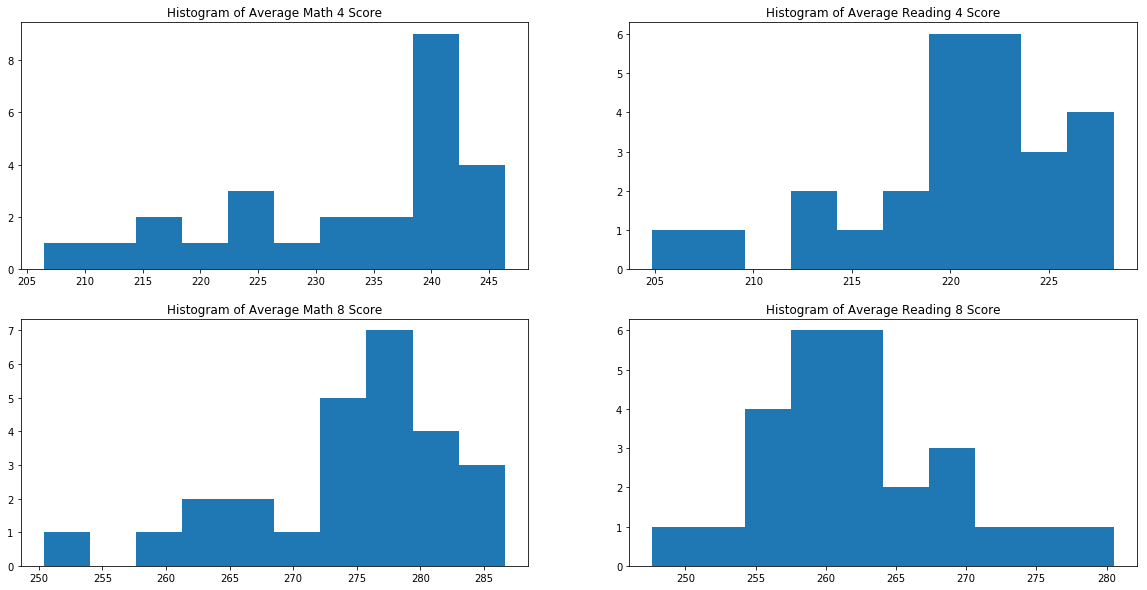

In [6]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(florida['AVG_MATH_4_SCORE'])
plt.title('Histogram of Average Math 4 Score')

plt.subplot(2,2,2)
plt.hist(florida['AVG_READING_4_SCORE'])
plt.title('Histogram of Average Reading 4 Score')

plt.subplot(2,2,3)
plt.hist(florida['AVG_MATH_8_SCORE'])
plt.title('Histogram of Average Math 8 Score')

plt.subplot(2,2,4)
plt.hist(florida['AVG_READING_8_SCORE'])
plt.title('Histogram of Average Reading 8 Score')

plt.show()

As we can see, none of the histograms are normally distributed. The average math 4 score, average reading 4 score, and average math 8 score are all skewed to the left, noting that the mean is slightly lower than the median. On the other hand, average reading 8 score appears to be the closest to being normally distributed. There appears to be a couple of outliers on the right side, and pulling the mean to the right of the median.  

#### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [16]:
# Replace missing values 

null_val = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_4_SCORE']

# Replace with mean
florida2 = florida.copy()

for col in null_val:
    florida2.loc[:, col].fillna(florida2.loc[:, col].mean(), inplace=True)

# Replace with median
florida3 = florida.copy()

for col in null_val:
    florida3.loc[:, col].fillna(florida3.loc[:, col].median(), inplace=True)

# Replace by interpolate
florida4 = florida.copy()

for col in null_val:
    florida4.loc[:, col].interpolate(inplace=True)
    
print(florida['AVG_MATH_4_SCORE'].mean())
print(florida['AVG_MATH_4_SCORE'].median())
print(len(florida))
print(florida['AVG_MATH_4_SCORE'].isnull().sum())

233.00564816782486
238.4973765950811
26
0


In [8]:
# Print Statistics for each fill in method

print(pd.concat([florida['AVG_MATH_4_SCORE'],florida2['AVG_MATH_4_SCORE'],
                 florida3['AVG_MATH_4_SCORE'],florida4['AVG_MATH_4_SCORE']], 
                axis=1).describe())

       AVG_MATH_4_SCORE  AVG_MATH_4_SCORE  AVG_MATH_4_SCORE  AVG_MATH_4_SCORE
count         26.000000         26.000000         26.000000         26.000000
mean         233.005648        233.005648        233.005648        233.005648
std           11.312986         11.312986         11.312986         11.312986
min          206.423266        206.423266        206.423266        206.423266
25%          224.822378        224.822378        224.822378        224.822378
50%          238.497377        238.497377        238.497377        238.497377
75%          241.442573        241.442573        241.442573        241.442573
max          246.367696        246.367696        246.367696        246.367696


Since there are no missing values, the data does not change after fill in methods. 

Text(0.5,1,'Histogram of Average Math 4 Score Interpolated')

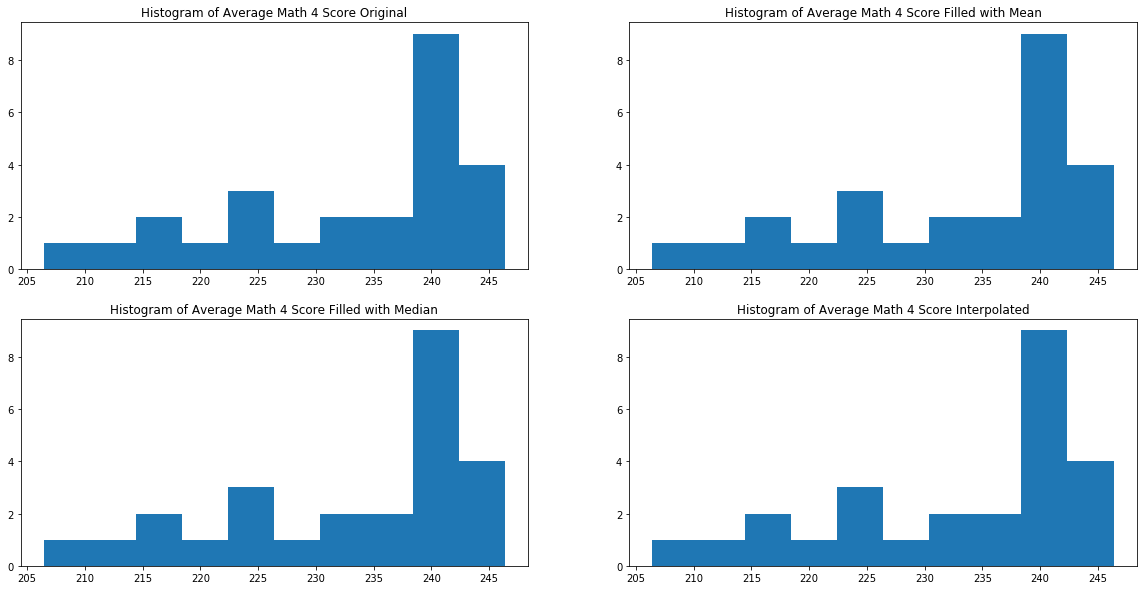

In [9]:
# Plot average math 4 score 

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(florida['AVG_MATH_4_SCORE'])
plt.title('Histogram of Average Math 4 Score Original')

plt.subplot(2,2,2)
plt.hist(florida['AVG_MATH_4_SCORE'].fillna(florida['AVG_MATH_4_SCORE'].mean()))
plt.title('Histogram of Average Math 4 Score Filled with Mean')

plt.subplot(2,2,3)
plt.hist(florida['AVG_MATH_4_SCORE'].fillna(florida['AVG_MATH_4_SCORE'].median()))
plt.title('Histogram of Average Math 4 Score Filled with Median')

plt.subplot(2,2,4)
plt.hist(florida['AVG_MATH_4_SCORE'].interpolate())
plt.title('Histogram of Average Math 4 Score Interpolated')

Text(0.5,1,'Histogram of Average Math 8 Score Interpolated')

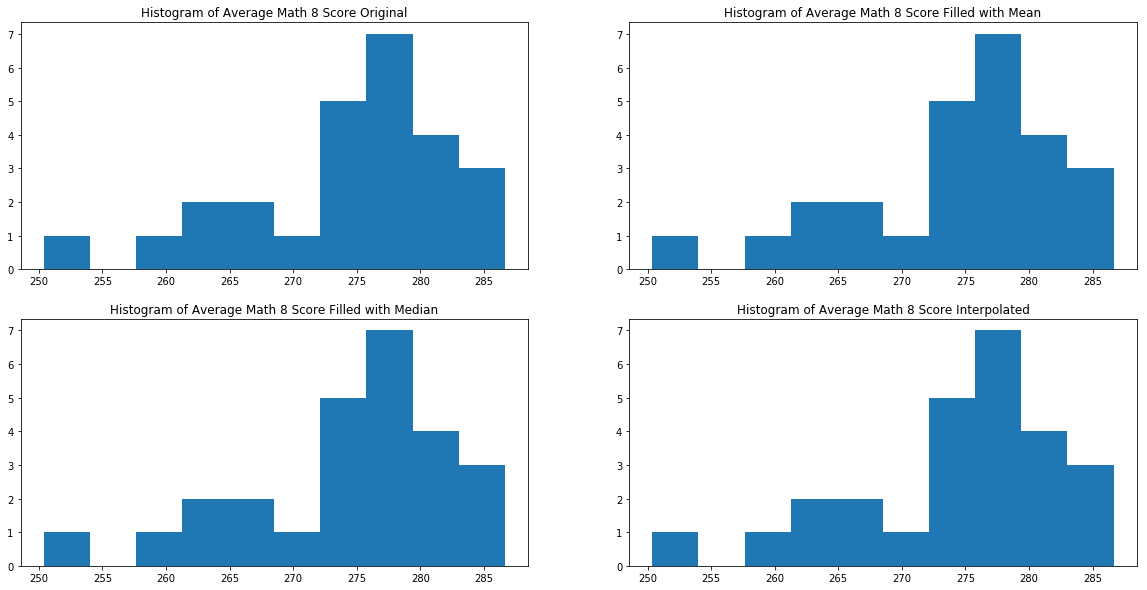

In [10]:
# Plot average math 8 score 

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(florida['AVG_MATH_8_SCORE'])
plt.title('Histogram of Average Math 8 Score Original')

plt.subplot(2,2,2)
plt.hist(florida['AVG_MATH_8_SCORE'].fillna(florida['AVG_MATH_8_SCORE'].mean()))
plt.title('Histogram of Average Math 8 Score Filled with Mean')

plt.subplot(2,2,3)
plt.hist(florida['AVG_MATH_8_SCORE'].fillna(florida['AVG_MATH_8_SCORE'].median()))
plt.title('Histogram of Average Math 8 Score Filled with Median')

plt.subplot(2,2,4)
plt.hist(florida['AVG_MATH_8_SCORE'].interpolate())
plt.title('Histogram of Average Math 8 Score Interpolated')


Text(0.5,1,'Histogram of Average Reading 4 Score Interpolated')

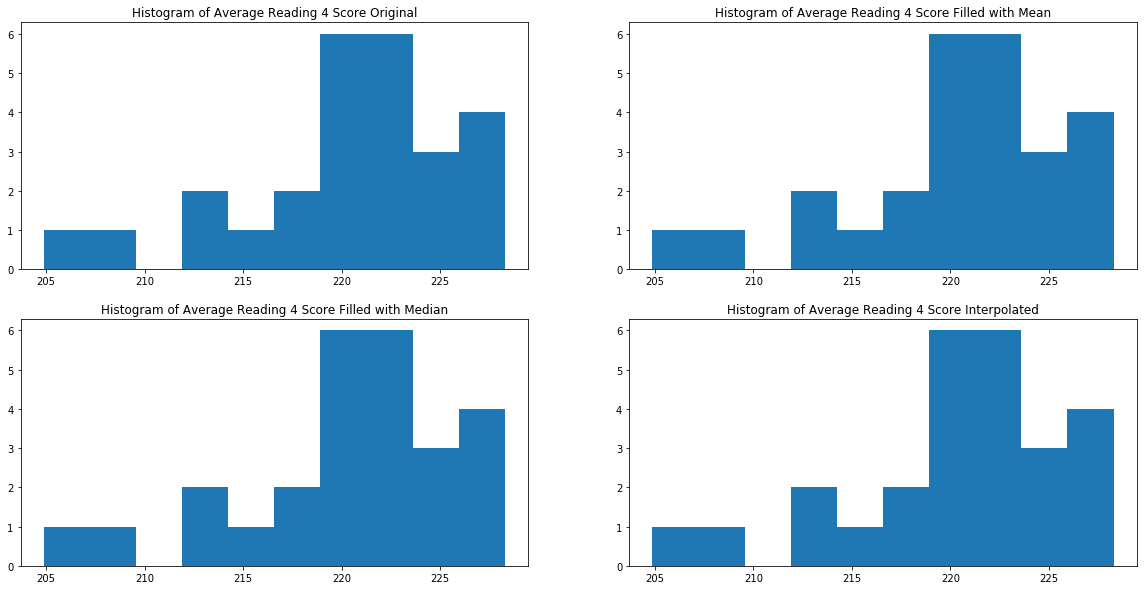

In [11]:
# Plot average reading 4 score 

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(florida['AVG_READING_4_SCORE'])
plt.title('Histogram of Average Reading 4 Score Original')

plt.subplot(2,2,2)
plt.hist(florida['AVG_READING_4_SCORE'].fillna(florida['AVG_READING_4_SCORE'].mean()))
plt.title('Histogram of Average Reading 4 Score Filled with Mean')

plt.subplot(2,2,3)
plt.hist(florida['AVG_READING_4_SCORE'].fillna(florida['AVG_READING_4_SCORE'].median()))
plt.title('Histogram of Average Reading 4 Score Filled with Median')

plt.subplot(2,2,4)
plt.hist(florida['AVG_READING_4_SCORE'].interpolate())
plt.title('Histogram of Average Reading 4 Score Interpolated')


Text(0.5,1,'Histogram of Average Reading 8 Score Interpolated')

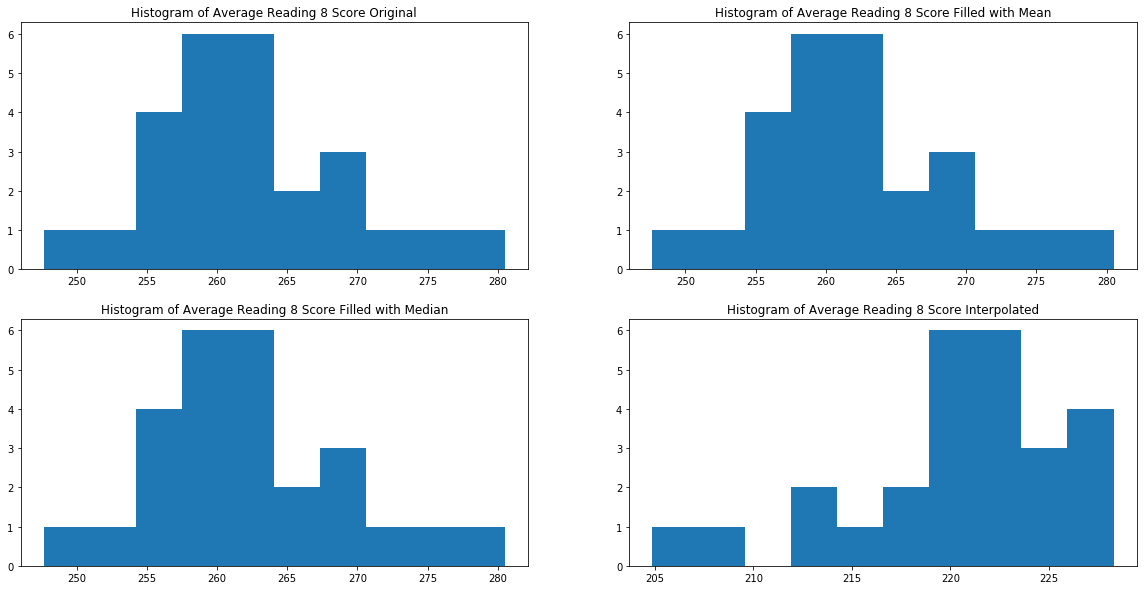

In [12]:
# Plot average reading 8 score 

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(florida['AVG_READING_8_SCORE'])
plt.title('Histogram of Average Reading 8 Score Original')

plt.subplot(2,2,2)
plt.hist(florida['AVG_READING_8_SCORE'].fillna(florida['AVG_READING_8_SCORE'].mean()))
plt.title('Histogram of Average Reading 8 Score Filled with Mean')

plt.subplot(2,2,3)
plt.hist(florida['AVG_READING_8_SCORE'].fillna(florida['AVG_READING_8_SCORE'].median()))
plt.title('Histogram of Average Reading 8 Score Filled with Median')

plt.subplot(2,2,4)
plt.hist(florida['AVG_READING_4_SCORE'].interpolate())
plt.title('Histogram of Average Reading 8 Score Interpolated')
